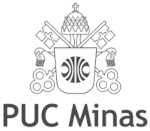

## Programa de Pós Graduação em Informática

### Disciplina: Indução de Regras e Árvores de Decisão

### Aluno: Felipe A. L. Reis

In [1]:
import datetime
import os, shutil
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

#impressão de árvore de decisão
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus

In [2]:
def load_data(filename):
    data = pd.read_csv(filename, delimiter=',')
        
    # Remove duplicate
    data = data[~data.ID.duplicated(keep='first')]
    
    return data

---
# Aprendizado de Dados de Saúde Pública da Coréia do Sul

O trabalho a seguir foi desenvolvido para tarefas de aprendizado de máquinas em uma base de dados de saúde pública da Coréia.

A base é denominada **[National Health Insurance Corporation_Health Checkup Information](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation)** (tradução automática de coreano para inglês) e está disponível no [portal público de dados do governo da Coréia](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation).

A base de dados foi obtida à partir da base **[Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)**, disponível no [Kaglle](https://www.kaggle.com/). Essa última base corresponde a uma versão simplificada da base original.

A base [National Health Insurance Corporation_Health Checkup Information](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) contém 1.000.000 de registros de check-up de saúde e seus dependentes com mais de 40 anos, membros locais que são chefes de família e membros locais com mais de 40 anos e aqueles que atingiram a idade de 40 e 66 entre os sujeitos a check-up geral de saúde.

São dados abertos que consistem em informações básicas (sexo, idade, código do teste, etc.) e detalhes do exame (altura, peso, colesterol total, hemoglobina, etc.).

As informações de uso de cigarros não englobam cigarros eletrônicos.

---
# Análise Inicial dos Dados

In [3]:
data = load_data('dataset/smoking-dataset-label.csv')
data

,year,ID,try_code,gender,age_code,height,weight,waist,sight_left,sight_right,...,serum_creatinine,ast_sgot,alt_sgpt,gama_gtp,smoking_status,drinking,dental_examination,dental_caries,dental_tartar,release_date
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
data.columns

Index(['year', 'ID', 'try_code', 'gender', 'age_code', 'height', 'weight',
       'waist', 'sight_left', 'sight_right', 'hearing_left', 'hearing_right',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose',
       'total_cholesterol', 'triglycerides', 'hdl_cholesterol',
       'ldl_cholesterol', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'ast_sgot', 'alt_sgpt', 'gama_gtp', 'smoking_status', 'drinking',
       'dental_examination', 'dental_caries', 'dental_tartar', 'release_date'],
      dtype='object')

### Remoção de Atributos

Remove colunas desnecessárias.

In [5]:
data = data.drop('year', axis=1)               #somente ano 2020
#data = data.drop('ID', axis=1)                 #identificador do paciente
data = data.drop('try_code', axis=1)           #código da localidade
#data = data.drop('urine_protein', axis=1)      #proteína na urina (maior parte dos valores iguais a 1)
data = data.drop('dental_tartar', axis=1)      #tártaro nos dentes
data = data.drop('release_date', axis=1)       #data de disponibilização dos dados
data

,ID,gender,age_code,height,weight,waist,sight_left,sight_right,hearing_left,hearing_right,...,hemoglobin,urine_protein,serum_creatinine,ast_sgot,alt_sgpt,gama_gtp,smoking_status,drinking,dental_examination,dental_caries
0,1,1,9,165,60,72.1,1.2,1.5,1.0,1.0,...,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN
1,2,2,13,150,65,81.0,0.8,0.8,1.0,1.0,...,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN
2,3,2,12,155,55,70.0,0.6,0.7,1.0,1.0,...,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN
3,4,1,13,160,70,90.8,1.0,1.0,1.0,2.0,...,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0
4,5,2,12,155,50,75.2,1.5,1.2,1.0,1.0,...,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,2,13,145,55,81.0,0.9,1.0,1.0,1.0,...,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN
999996,999997,2,12,160,55,76.5,1.5,1.5,1.0,1.0,...,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN
999997,999998,1,9,175,70,85.0,1.2,1.2,1.0,1.0,...,16.0,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN
999998,999999,2,9,160,70,91.0,0.6,0.5,1.0,1.0,...,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN


### Conversão de Código de Gênero

Criação de código numérico de gênero em M/F, para facilitar a filtragem de dados.

In [6]:
data['gender_num'] = data['gender']
data['gender'] = data['gender'].transform(lambda x: 'M' if x == 1. else 'F').astype('string')
data[['gender']]

,gender
0,M
1,F
2,F
3,M
4,F
...,...
999995,F
999996,F
999997,M
999998,F


### Conversão de Código em Faixa de Idade

Conversão do código de idade em idade, em faixas de 5 anos.

In [7]:
data['age'] = ((data['age_code']-1) * 5)
data[['age_code', 'age']]

,age_code,age
0,9,40
1,13,60
2,12,55
3,13,60
4,12,55
...,...,...
999995,13,60
999996,12,55
999997,9,40
999998,9,40


### Conversão de Dados de Consumo de Álcool

Conversão de códigos numéricos relacionados ao consumo de álcool.

In [8]:
pd.unique(data.drinking)

array([ 0.,  1., nan])

In [9]:
data['drink'] = data['drinking'].transform(
    lambda x: 'S' if x == 1.0 else('N' if x == 0.0 else None)).astype('string')
data[['drinking', 'drink']]

,drinking,drink
0,0.0,N
1,0.0,N
2,0.0,N
3,0.0,N
4,0.0,N
...,...,...
999995,0.0,N
999996,1.0,S
999997,1.0,S
999998,0.0,N


### Conversão de Dados de Consumo de Tabaco

Conversão de códigos numéricos relacionados uso de tabaco.

In [10]:
pd.unique(data.smoking_status)

array([ 1.,  3.,  2., nan])

In [11]:
#remove itens nulos
data = data[data.smoking_status.notnull()] #343 registros

In [12]:
data['smoking'] = data['smoking_status'].transform(
    lambda x: 'NF' if x == 1.0 else('EX' if x == 2.0 else ('FU' if x == 3.0 else ""))
).astype('string')
data[['smoking', 'smoking_status']]

/tmp/ipykernel_32196/1307618391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking'] = data['smoking_status'].transform(


,smoking,smoking_status
0,NF,1.0
1,NF,1.0
2,NF,1.0
3,NF,1.0
4,NF,1.0
...,...,...
999995,NF,1.0
999996,NF,1.0
999997,NF,1.0
999998,NF,1.0


### Conversão de Dados relacionados à Saúde Bucal

Caso seja necessário, um paciente pode ser indicado a um exame bucal (ir ao dentista).
Esse procedimento não é obrigatório para todas as pessoas, sendo indicado pelo médico.
Todos os pacientes que foram submetidos ao dentista possuem informação sobre existência ou não de cáries. 
Os demais pacientes não possuem essa informação cadastrada.

No dentista, o paciente pode receber informações sobre a existência de cáries e/ou tártaros.
Somente serão considerados casos de cáries. 

In [13]:
#pd.unique(data['dental_caries'])
pd.unique(data['dental_examination'])

array([0, 1])

In [14]:
data['dentist'] = data['dental_examination'].transform(
    lambda x: 'S' if x == 1.0 else ('N' if x == 0.0 else None)
).astype('string')

data['caries'] = data['dental_caries'].transform(
    lambda x: 'S' if x == 1.0 else('N' if x == 0.0 else None)
).astype('string')

data[['dental_examination', 'dentist', 'dental_caries', 'caries']]

/tmp/ipykernel_32196/4226902165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dentist'] = data['dental_examination'].transform(
/tmp/ipykernel_32196/4226902165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['caries'] = data['dental_caries'].transform(


,dental_examination,dentist,dental_caries,caries
0,0,N,NaN,<NA>
1,0,N,NaN,<NA>
2,0,N,NaN,<NA>
3,1,S,0.0,N
4,0,N,NaN,<NA>
...,...,...,...,...
999995,0,N,NaN,<NA>
999996,0,N,NaN,<NA>
999997,0,N,NaN,<NA>
999998,0,N,NaN,<NA>


### Atributo IMC

Criação de atributo de massa corporal, com base na altura e no peso.

In [15]:
data['imc'] = (data['weight'] / ((data['height']/100)**2))
data[['weight', 'height', 'imc']]

/tmp/ipykernel_32196/3270439238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['imc'] = (data['weight'] / ((data['height']/100)**2))


,weight,height,imc
0,60,165,22.038567
1,65,150,28.888889
2,55,155,22.892820
3,70,160,27.343750
4,50,155,20.811655
...,...,...,...
999995,55,145,26.159334
999996,55,160,21.484375
999997,70,175,22.857143
999998,70,160,27.343750


### Atributo Grau de IMC (Classificação)

Criação de atributo correspondente à classificação do IMC, em graus, conforme modelo:

| Classificação    | IMC          |
|------------------|--------------|
| Baixo Peso       | <= 18.5      |
| Normal           | 18.5 - 24.9  |
| Sobrepeso        | 24.9 - 29.9  |
| Obesidade Grau 1 | 29.9 - 34.9  |
| Obesidade Grau 2 | 34.9 - 39.9  |
| Obesidade Grau 3 | > 39.9       |

In [16]:
#fonte: https://www.brainlatam.com/blog/neuromodulacao-pode-ajudar-contra-obesidade-1281

data['imc_grau'] = data['imc'].transform(lambda imc: 
    "BP" if imc <= 18.5 
    else ( "N" if (imc > 18.5 and imc <= 24.9) 
    else ("SP" if (imc > 24.9 and imc <= 29.9) 
    else ("O1" if (imc > 29.9 and imc <= 34.9) 
    else ("O2" if (imc > 34.9 and imc <= 39.9) 
    else ("O3")))))
).astype('string')

data[['weight', 'height', 'imc', 'imc_grau']]

/tmp/ipykernel_32196/4199582599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['imc_grau'] = data['imc'].transform(lambda imc:


,weight,height,imc,imc_grau
0,60,165,22.038567,N
1,65,150,28.888889,SP
2,55,155,22.892820,N
3,70,160,27.343750,SP
4,50,155,20.811655,N
...,...,...,...,...
999995,55,145,26.159334,SP
999996,55,160,21.484375,N
999997,70,175,22.857143,N
999998,70,160,27.343750,SP


### Remoção de Outros Atributos

In [17]:
data = data.drop('age_code', axis=1)
#data = data.drop('hearing_left', axis=1)
#data = data.drop('hearing_right', axis=1)
#data = data.drop('sight_left', axis=1)
#data = data.drop('sight_right', axis=1)
data = data.drop('dental_examination', axis=1)
data = data.drop('dental_caries', axis=1)
data

,ID,gender,height,weight,waist,sight_left,sight_right,hearing_left,hearing_right,systolic_blood_pressure,...,smoking_status,drinking,gender_num,age,drink,smoking,dentist,caries,imc,imc_grau
0,1,M,165,60,72.1,1.2,1.5,1.0,1.0,127.0,...,1.0,0.0,1,40,N,NF,N,<NA>,22.038567,N
1,2,F,150,65,81.0,0.8,0.8,1.0,1.0,110.0,...,1.0,0.0,2,60,N,NF,N,<NA>,28.888889,SP
2,3,F,155,55,70.0,0.6,0.7,1.0,1.0,123.0,...,1.0,0.0,2,55,N,NF,N,<NA>,22.892820,N
3,4,M,160,70,90.8,1.0,1.0,1.0,2.0,134.0,...,1.0,0.0,1,60,N,NF,S,N,27.343750,SP
4,5,F,155,50,75.2,1.5,1.2,1.0,1.0,144.0,...,1.0,0.0,2,55,N,NF,N,<NA>,20.811655,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,F,145,55,81.0,0.9,1.0,1.0,1.0,132.0,...,1.0,0.0,2,60,N,NF,N,<NA>,26.159334,SP
999996,999997,F,160,55,76.5,1.5,1.5,1.0,1.0,100.0,...,1.0,1.0,2,55,S,NF,N,<NA>,21.484375,N
999997,999998,M,175,70,85.0,1.2,1.2,1.0,1.0,110.0,...,1.0,1.0,1,40,S,NF,N,<NA>,22.857143,N
999998,999999,F,160,70,91.0,0.6,0.5,1.0,1.0,137.0,...,1.0,0.0,2,40,N,NF,N,<NA>,27.343750,SP


In [18]:
data.to_csv('dataset/smoking-dataset-initial.csv')